In [9]:
# Titanic Ship Case Study

# Q.2. Load the Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/krish/Desktop/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


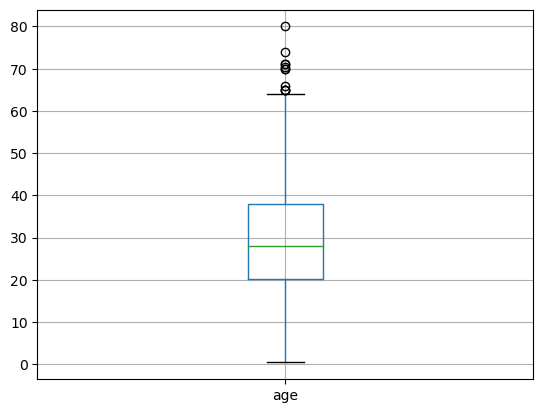

In [20]:
# Q.3. Perform Below Visualizations
#      Univariate Analysis

df.boxplot(column = ['age'])
plt.show()





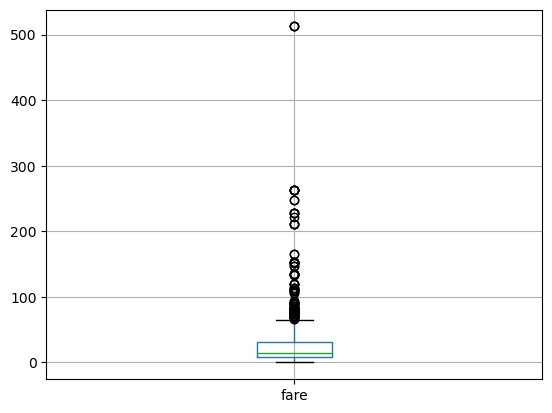

In [21]:
df.boxplot(column = ['fare'])
plt.show()


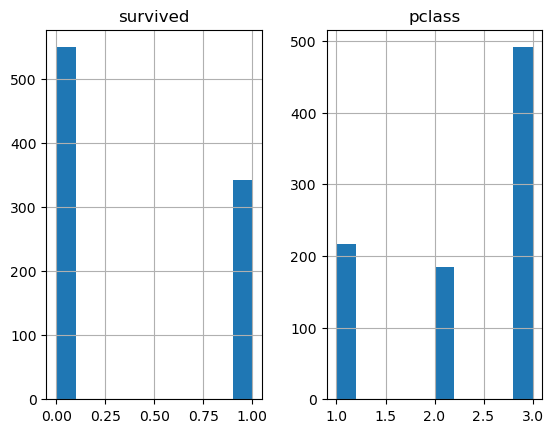

In [30]:
df.hist(column = ['survived','pclass'])
plt.show()


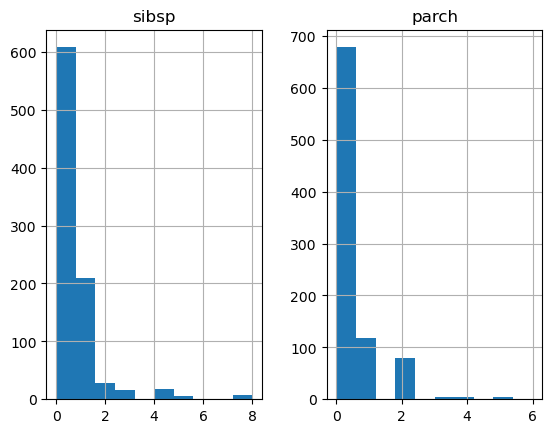

In [31]:
df.hist(column = ['sibsp','parch'])
plt.show()


In [46]:
# Q.4. Perfrom Descriptive statistics on the dataset

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
# Q.5. Handling the Missing values

df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
df['age'].fillna(df['age'].median(), inplace=True)

In [75]:
# Q.6. Find the outliers and replace the outliers

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['fare'] = np.where(df['fare'] > upper_bound, df['fare'].median(), df['fare'])


In [76]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['age'] = np.where(df['age'] > upper_bound, df['age'].median(), df['age'])


In [64]:
# Q.7. Check for Categorical columns and perform encoding.

categorical_columns = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)


In [65]:
# Q.8. Split the data into dependent and independent variables

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']


In [67]:
# Q.9. Scale the independent variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'S'

In [ ]:
# Q.10. Split data into training and testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
